<a href="https://colab.research.google.com/github/IrfanSulaiman08/Built-a-Tweet-Sentiment-Analysis-Model-Using-NLP-Machine-Learning-/blob/main/Tweet_Sentiment_Analysis_using_NLP_%26_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
df=pd.read_csv("/content/Tweets.csv")
df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [5]:
df.isna().sum()

,0
textID,0
text,1
selected_text,1
sentiment,0


In [6]:
df.drop(["textID","selected_text"],axis=1,inplace=True)

In [7]:
df

,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative
...,...,...
27476,wish we could come see u on Denver husband l...,negative
27477,I`ve wondered about rake to. The client has ...,negative
27478,Yay good for both of you. Enjoy the break - y...,positive
27479,But it was worth it ****.,positive


In [8]:
df["sentiment"].value_counts()

,count
sentiment,
neutral,11118
positive,8582
negative,7781


<Axes: xlabel='sentiment', ylabel='count'>

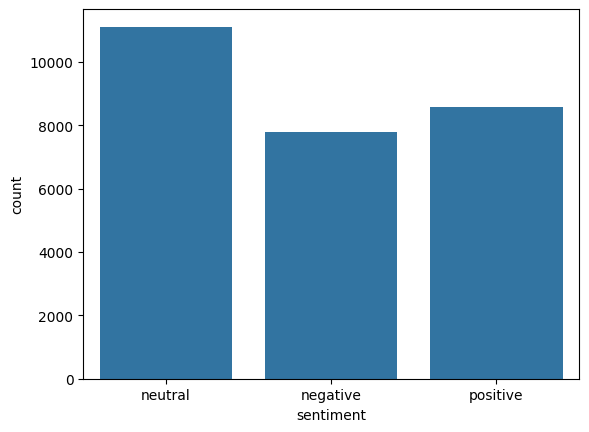

In [9]:
import seaborn as sns
sns.countplot(x=df["sentiment"])

In [10]:
df.dropna(inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27480 entries, 0 to 27480
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       27480 non-null  object
 1   sentiment  27480 non-null  object
dtypes: object(2)
memory usage: 644.1+ KB


In [12]:
df["sentiment"]=df["sentiment"].map({"positive":1,"neutral":0,"negative":-1})

In [13]:
df.head()

,text,sentiment
0,"I`d have responded, if I were going",0
1,Sooo SAD I will miss you here in San Diego!!!,-1
2,my boss is bullying me...,-1
3,what interview! leave me alone,-1
4,"Sons of ****, why couldn`t they put them on t...",-1


In [14]:
tweet=df["text"]

In [15]:
tweet=tweet.str.replace("[^a-z A-Z]+","",regex=True)

In [16]:
tweet

,text
0,Id have responded if I were going
1,Sooo SAD I will miss you here in San Diego
2,my boss is bullying me
3,what interview leave me alone
4,Sons of why couldnt they put them on the rel...
...,...
27476,wish we could come see u on Denver husband l...
27477,Ive wondered about rake to The client has ma...
27478,Yay good for both of you Enjoy the break you...
27479,But it was worth it


In [17]:
from nltk.stem import SnowballStemmer#(:language)

from nltk import TweetTokenizer
ss=SnowballStemmer("english")
tk=TweetTokenizer()

In [18]:
tweet=tweet.apply(lambda x:" ".join([ss.stem(i.lower())for i in tk.tokenize(x)]))

In [19]:
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")
sw=stopwords.words("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
tweet

,text
0,id have respond if i were go
1,sooo sad i will miss you here in san diego
2,my boss is bulli me
3,what interview leav me alon
4,son of whi couldnt they put them on the releas...
...,...
27476,wish we could come see u on denver husband los...
27477,ive wonder about rake to the client has made i...
27478,yay good for both of you enjoy the break you p...
27479,but it was worth it


In [21]:
tweet=tweet.apply(lambda x:" ".join([i for i in x.split() if i not in sw]))

In [22]:
tweet

,text
0,id respond go
1,sooo sad miss san diego
2,boss bulli
3,interview leav alon
4,son whi couldnt put releas alreadi bought
...,...
27476,wish could come see u denver husband lost job ...
27477,ive wonder rake client made clear net onli don...
27478,yay good enjoy break probabl need hectic weeke...
27479,worth


In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
X=tf.fit_transform(tweet)

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,df["sentiment"],test_size=0.2, random_state=42)

In [30]:
from sklearn.ensemble import RandomForestClassifier
ef=RandomForestClassifier()
ef.fit(X_train,y_train)


RandomForestClassifier()

In [32]:
from sklearn.metrics import accuracy_score
y_predict=ef.predict(X_test)
print(accuracy_score(y_test,y_predict))

0.6990538573508006


In [33]:
new="this is good for health"

l=[ss.stem(i.lower()) for i in new.split()]

l=[i for i in l if i not in sw]

l

['good', 'health']